In [1]:
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint
import json
import os



In [257]:
# Load datasets
# ratings = pd.read_csv('BX-Book-Ratings.csv', delimiter=";", encoding="latin1")
# users = pd.read_csv('BX-Users.csv', delimiter=";", encoding="latin1")
# books = pd.read_csv('BX-Books.csv', delimiter=";", encoding="latin-1", on_bad_lines='skip')
# books.drop(['Image-URL-S','Image-URL-M','Image-URL-L'], axis=1, inplace=True)


In [169]:
#some  preprocessing
# books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc',:]

# books.loc[books.ISBN == '078946697X','Year-Of-Publication'] = 2000
# books.loc[books.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
# books.loc[books.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"

# books.loc[books.ISBN == '0789466953', 'Year-Of-Publication'] = 2000
# books.loc[books.ISBN == '0789466953', 'Book-Author'] = "James Buckley"
# books.loc[books.ISBN == '0789466953', 'Publisher'] = "DK Publishing Inc"

# books.loc[books.ISBN == '2070426769','Year-Of-Publication'] = 2003
# books.loc[books.ISBN == '2070426769','Book-Author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'
# books.loc[books.ISBN == '2070426769','Publisher'] = 'Gallimard'


# books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'])



# WE STILL NEED TO DEAL WITH CASES WHERE YEAR IS LET'S SAY 0
 

In [170]:
# Merge BX-Books with BX-Book-Ratings on ISBN
# rating_book = pd.merge(ratings, books, on='ISBN')
# full_data  = pd.merge(rating_book, users, on="User-ID")


In [171]:
# Show the first few rows
# full_data.head(12)
# full_data.to_csv('full.csv', index=False)

In [2]:
df=pd.read_csv("full.csv")
df

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"tyler, texas, usa",NaN
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,"seattle, washington, usa",NaN
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,"h, new south wales, australia",16.0
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,"rijeka, n/a, croatia",16.0
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,"rijeka, n/a, croatia",16.0
...,...,...,...,...,...,...,...,...,...
1031131,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998,A.R.E. Press (Association of Research &amp; Enlig,"cedar park, texas, usa",NaN
1031132,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,"cedar park, texas, usa",NaN
1031133,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,"quebec, quebec, canada",18.0
1031134,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,"mannington, west virginia, usa",38.0


In [206]:
#REMOVE IMPLICIT RATINGS, WHERE RATING=0
# df_implicit= df[df["Book-Rating"] > 0]
# df_implicit.to_csv('implicit.csv', index=False)


In [3]:
df_explicit=pd.read_csv('implicit.csv')

In [4]:
df_explicit

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,Age
0,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,"seattle, washington, usa",NaN
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,"rijeka, n/a, croatia",16.0
2,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,"rijeka, n/a, croatia",16.0
3,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,"torrance, california, usa",NaN
4,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003,HarperTorch,"iowa city, iowa, usa",25.0
...,...,...,...,...,...,...,...,...,...
383837,276704,0743211383,7,Dreamcatcher,Stephen King,2001,Scribner,"cedar park, texas, usa",NaN
383838,276704,0806917695,5,Perplexing Lateral Thinking Puzzles: Scholasti...,Paul Sloane,1997,Sterling Publishing,"cedar park, texas, usa",NaN
383839,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,"cedar park, texas, usa",NaN
383840,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,"mannington, west virginia, usa",38.0


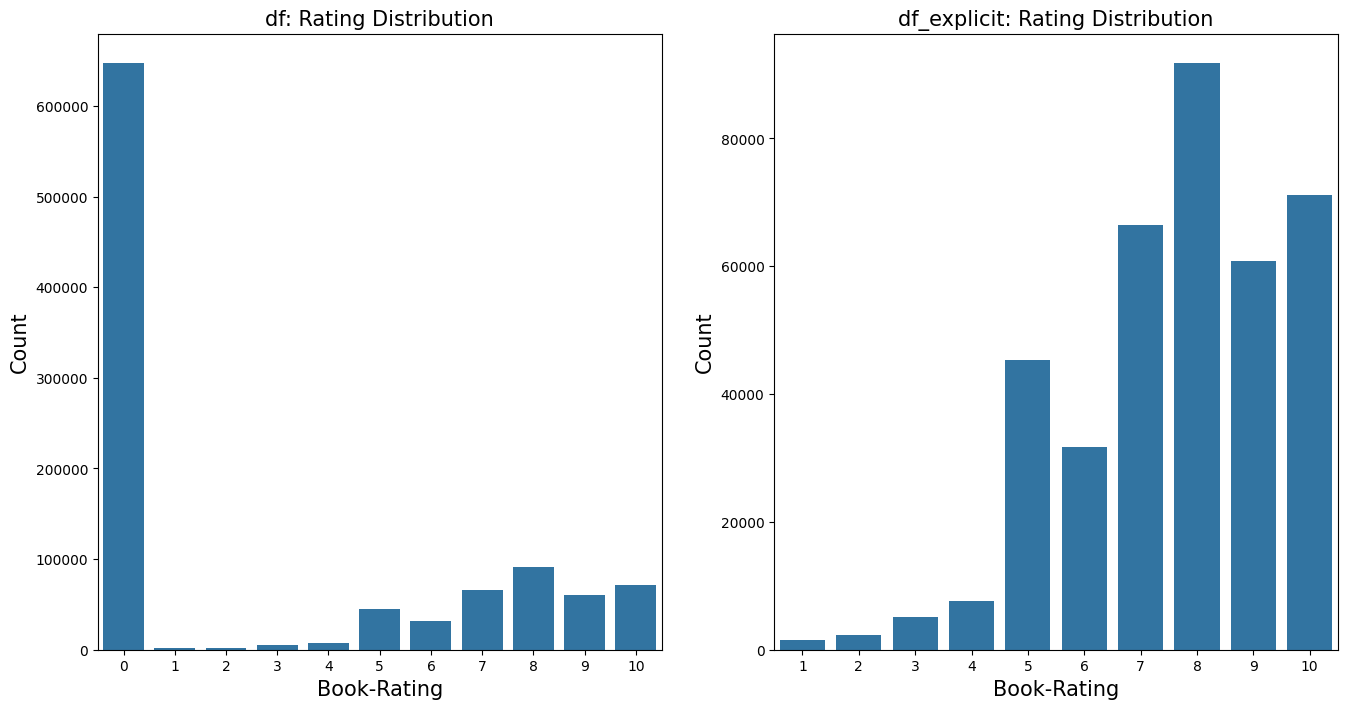

In [5]:
# Create a 1x2 grid of subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot the value counts for df_filtered on the first subplot
sns.countplot(x='Book-Rating', data=df, ax=axes[0])
axes[0].set_title('df: Rating Distribution', size=15)
axes[0].set_xlabel('Book-Rating', size=15)
axes[0].set_ylabel('Count', size=15)

# Plot the value counts for the original df on the second subplot
sns.countplot(x='Book-Rating', data=df_explicit, ax=axes[1])
axes[1].set_title('df_explicit: Rating Distribution', size=15)
axes[1].set_xlabel('Book-Rating', size=15)
axes[1].set_ylabel('Count', size=15)

# Display the plots

plt.show()

In [6]:
unique_books_original = df['ISBN'].nunique()
print(f"Unique books in the original dataset (including implicit ratings): {unique_books_original}")
unique_books_filtered = df_explicit['ISBN'].nunique()
print(f"Unique books after removing implicit ratings (rating = 0): {unique_books_filtered}")

Unique books in the original dataset (including implicit ratings): 270151
Unique books after removing implicit ratings (rating = 0): 149836


In [364]:

# # Step 1: Remove implicit ratings (ratings == 0)
# df_explicit = df_explicit[df_explicit["Book-Rating"] > 0]

# # Step 2: Count the number of ratings per user and filter users with between 5 and 200 ratings
# user_counts = df_explicit["User-ID"].value_counts()
# valid_users = user_counts[(user_counts >= 5) & (user_counts <= 200)].index
# df_explicit = df_explicit[df_explicit["User-ID"].isin(valid_users)]

# # Step 3: Count the number of ratings per book (ISBN)
# book_counts = df_explicit["ISBN"].value_counts()

# # Step 4: Filter books with at least 5 ratings
# valid_books = book_counts[book_counts >= 5].index
# df_explicit = df_explicit[df_explicit["ISBN"].isin(valid_books)]

# # Step 5: Reapply user filter after removing books
# user_counts_after_isbns = df_explicit["User-ID"].value_counts()
# valid_users_after_isbns = user_counts_after_isbns[(user_counts_after_isbns >= 5) & (user_counts_after_isbns <= 200)].index
# df_explicit = df_explicit[df_explicit["User-ID"].isin(valid_users_after_isbns)]

# # Final Check: Print the number of users with fewer than 5 ratings
# users_with_less_than_5 = user_counts_after_isbns[user_counts_after_isbns < 5]
# print("Users with fewer than 5 ratings:", users_with_less_than_5)
# print("Number of users with fewer than 5 ratings:", len(users_with_less_than_5))




Users with fewer than 5 ratings: Series([], Name: count, dtype: int64)
Number of users with fewer than 5 ratings: 0
Final dataset shape: (87275, 9)


In [373]:
# df_explicit.to_csv('filtered.csv', index=False)

In [5]:
df_filtered= pd.read_csv('filtered.csv')

In [6]:
df_filtered


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,Age
0,276964,0345354621,10,The Terminal Man,Michael Crichton,1988,Ballantine Books,"villa ridge, missouri, usa",34.0
1,276964,0440220602,9,The Chamber,John Grisham,1995,Dell Publishing Company,"villa ridge, missouri, usa",34.0
2,276964,0684867621,8,The Girl Who Loved Tom Gordon : A Novel,Stephen King,1999,Scribner,"villa ridge, missouri, usa",34.0
3,276964,0812550307,10,"The Fires of Heaven (The Wheel of Time, Book 5)",Robert Jordan,1994,Tor Fantasy,"villa ridge, missouri, usa",34.0
4,276964,0843949163,8,In the Dark,Richard Laymon,2001,Leisure Books,"villa ridge, missouri, usa",34.0
...,...,...,...,...,...,...,...,...,...
87270,276688,0553575104,6,In Pursuit of the Proper Sinner,Elizabeth George,2000,Bantam Books,"fort lee, new jersey, usa",NaN
87271,276688,0688156134,8,Stalker: A Novel (Peter Decker &amp; Rina Laza...,Faye Kellerman,2000,William Morrow &amp; Company,"fort lee, new jersey, usa",NaN
87272,276688,0743202694,10,"Money, Money, Money : A Novel of the 87th Prec...",Ed McBain,2001,Simon &amp; Schuster,"fort lee, new jersey, usa",NaN
87273,276688,0836218655,10,Wiener Dog Art,Gary Larson,1990,Andrews McMeel Publishing,"fort lee, new jersey, usa",NaN


In [7]:
df_filtered['ISBN'].nunique()


6775

In [8]:
# File paths
CACHE_FILE = "api_cache.json"  # File to store API results
PROGRESS_FILE = "progress.csv"  # File to save progress
DATASET_FILE ="filtered.csv"  # original dataset

# API keys
API_KEYS = ["KEY1", "KEY3", "KEY2"]  # List of API keys
current_key_index = 0  # Track the current API key

In [9]:
def load_cache():
    """Load the cache file if it exists."""
    if os.path.exists(CACHE_FILE):
        with open(CACHE_FILE, "r") as f:
            return json.load(f)
    return {}
cache = load_cache()  # Load the cache

In [10]:
def load_progress():
    """Load the progress file if it exists."""
    if os.path.exists(PROGRESS_FILE):
        df = pd.read_csv(PROGRESS_FILE)
        print(f"Resuming from progress file: {PROGRESS_FILE}")
        return df
    print("No progress file found. Starting from scratch.")
    return pd.read_csv(DATASET_FILE)  # Load the original dataset

df = load_progress()  # Load progress or original dataset

Resuming from progress file: progress.csv


In [11]:
# Add new columns if they don't exist
if 'category' not in df.columns:
    df['category'] = None
if 'description' not in df.columns:
    df['description'] = None

In [383]:
# def fetch_book_info(isbn):
#     """Fetch book category and description from Google Books API using ISBN."""
#     url = f"https://www.googleapis.com/books/v1/volumes?q=isbn:{isbn}&key={API_KEY}"
#     response = requests.get(url)
    
#     if response.status_code == 200:
#         data = response.json()
#         if "items" in data:
#             book_info = data["items"][0]["volumeInfo"]
            
#             category = book_info.get("categories", ["Unknown"])[0]
#             description = book_info.get("description", "No description available.")
            
#             return category, description
#     return "Unknown", "No description available."

# # Example usage:
# isbn_sample = "0345354621"  # Replace with an ISBN from your dataset
# category, description = fetch_book_info(isbn_sample)

# print("Category:", category)
# print("Description:", description)


Category: Unknown
Description: No description available.


In [12]:
def fetch_book_info(isbn, retries=3):
    """Fetch book category and description from Google Books API using ISBN with retries."""
    global current_key_index
    if isbn in cache:
        return cache[isbn]  # Return cached result if available
    
    api_key = API_KEYS[current_key_index]
    url = f"https://www.googleapis.com/books/v1/volumes?q=isbn:{isbn}&key={api_key}"
    
    for _ in range(retries):
        try:
            response = requests.get(url)
            response.raise_for_status()  # Raise an HTTPError for bad responses (4xx, 5xx)
            
            data = response.json()
            if "items" in data:
                book_info = data["items"][0]["volumeInfo"]
                category = book_info.get("categories", ["Unknown"])[0]
                description = book_info.get("description", "No description available.")
                cache[isbn] = (category, description)
                return category, description

            # If no items in the response, return default values
            cache[isbn] = ("Unknown", "No description available.")
            return "Unknown", "No description available."
        
        except requests.exceptions.RequestException as e:
            print(f"Request failed for ISBN {isbn}: {e}. Retrying...")
            current_key_index = (current_key_index + 1) % len(API_KEYS)  # Rotate API key
            time.sleep(randint(5, 10))  # Increased sleep duration
    
    # Return default values if retries are exhausted
    cache[isbn] = ("Unknown", "No description available.")
    return "Unknown", "No description available."

In [13]:
def save_progress():
    """Save the current state of the dataset to a progress file."""
    df.to_csv(PROGRESS_FILE, index=False)
    print(f"Progress saved to {PROGRESS_FILE}.")

def save_cache():
    """Save the cache to a file."""
    with open(CACHE_FILE, "w") as f:
        json.dump(cache, f)
    print(f"Cache saved to {CACHE_FILE}.")

In [14]:
def process_books(df, batch_size=100, save_interval=100):
    """Process the dataset in batches."""
    total_books = len(df)
    
    for start_idx in range(0, total_books, batch_size):
        end_idx = min(start_idx + batch_size, total_books)
        batch = df.iloc[start_idx:end_idx]
        
        for idx, row in batch.iterrows():
            # Skip if already processed
            if pd.notna(row.get("category")) and pd.notna(row.get("description")):
                continue
            
            isbn = row['ISBN']
            category, description = fetch_book_info(isbn)
            
            # Update the dataframe
            df.at[idx, 'category'] = category
            df.at[idx, 'description'] = description
        
        # Print progress after each batch
        print(f"Processed {end_idx}/{total_books} books.")
        
        # Save progress periodically
        if end_idx % save_interval == 0 or end_idx == total_books:
            save_progress()
            save_cache()
        
        # Sleep between batches to avoid rate limits
        if end_idx < total_books:
            sleep_duration = randint(1,3)  # Longer sleep between batches
            print(f"Sleeping for {sleep_duration} seconds before the next batch...")
            time.sleep(sleep_duration)
    
    return df

In [17]:
# Start processing, we need to run this function on multiple days because of API limits
df = process_books(df_filtered, batch_size=100, save_interval=100)


Processed 100/87275 books.
Progress saved to progress.csv.
Cache saved to api_cache.json.
Sleeping for 2 seconds before the next batch...
Processed 200/87275 books.
Progress saved to progress.csv.
Cache saved to api_cache.json.
Sleeping for 1 seconds before the next batch...
Processed 300/87275 books.
Progress saved to progress.csv.
Cache saved to api_cache.json.
Sleeping for 1 seconds before the next batch...
Processed 400/87275 books.
Progress saved to progress.csv.
Cache saved to api_cache.json.
Sleeping for 3 seconds before the next batch...
Processed 500/87275 books.
Progress saved to progress.csv.
Cache saved to api_cache.json.
Sleeping for 3 seconds before the next batch...
Processed 600/87275 books.
Progress saved to progress.csv.
Cache saved to api_cache.json.
Sleeping for 1 seconds before the next batch...
Processed 700/87275 books.
Progress saved to progress.csv.
Cache saved to api_cache.json.
Sleeping for 3 seconds before the next batch...
Processed 800/87275 books.
Progres

In [ ]:
# # Save the final dataset
# df.to_csv("booksAPI.csv", index=False)
# print("Final dataset saved to 'final_dataset.csv'.")

In [26]:
df_filtered[df_filtered['category'].notna()==True]

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,Age,category,description
0,276964,0345354621,10,The Terminal Man,Michael Crichton,1988,Ballantine Books,"villa ridge, missouri, usa",34.0,Fiction,Hearry Benson suffers from violent seizures. W...
1,276964,0440220602,9,The Chamber,John Grisham,1995,Dell Publishing Company,"villa ridge, missouri, usa",34.0,American fiction,While the executioners prepare the gas chamber...
2,276964,0684867621,8,The Girl Who Loved Tom Gordon : A Novel,Stephen King,1999,Scribner,"villa ridge, missouri, usa",34.0,Fiction,A story of a nine year old who wanders off in ...
3,276964,0812550307,10,"The Fires of Heaven (The Wheel of Time, Book 5)",Robert Jordan,1994,Tor Fantasy,"villa ridge, missouri, usa",34.0,Unknown,No description available.
4,276964,0843949163,8,In the Dark,Richard Laymon,2001,Leisure Books,"villa ridge, missouri, usa",34.0,California,A tale of suspense follows young librarian Jan...
...,...,...,...,...,...,...,...,...,...,...,...
16398,53590,038082101X,8,Daughter of Fortune: A Novel,Isabel Allende,2001,HarperTorch,"thalwil, zurich, switzerland",40.0,Unknown,No description available.
16399,53590,0385512147,5,Bringing Elizabeth Home : A Journey of Faith a...,ED SMART,2003,Doubleday,"thalwil, zurich, switzerland",40.0,Criminal investigation,Describes the struggles of Ed and Lois Smart a...
16400,53590,0385720955,8,The Blind Assassin,Margaret Atwood,2001,Anchor Books/Doubleday,"thalwil, zurich, switzerland",40.0,Unknown,No description available.
16401,53590,0670032808,7,The Good Wife Strikes Back,Elizabeth Buchan,2003,Viking Books,"thalwil, zurich, switzerland",40.0,Fiction,"From the ""New York Times"" bestselling author o..."
